In [1]:
function mandelbrot(a)
    z = 0
    for i=1:50
        z = z^2 + a
    end
    return z
end

mandelbrot (generic function with 1 method)

In [2]:
for y=1.0:-0.05:-1.0
    for x=-2.0:0.0315:0.5
        abs(mandelbrot(complex(x, y))) < 2 ? print("*") : print(" ")
    end
    println()
end

                                                                                
                                                                                
                                                                                
                                                           **                   
                                                         ******                 
                                                       ********                 
                                                         ******                 
                                                      ******** **   *           
                                              ***   *****************           
                                              ************************  ***     
                                              ****************************      
                                           ******************************       
                            

┌ Info: Saved animation to 
│   fn = /home/george/ScriptHub/14.jupyter/tmp.gif
└ @ Plots /home/george/.julia/packages/Plots/jZRxE/src/animation.jl:104


Plots.AnimatedGif("/home/george/ScriptHub/14.jupyter/tmp.gif")
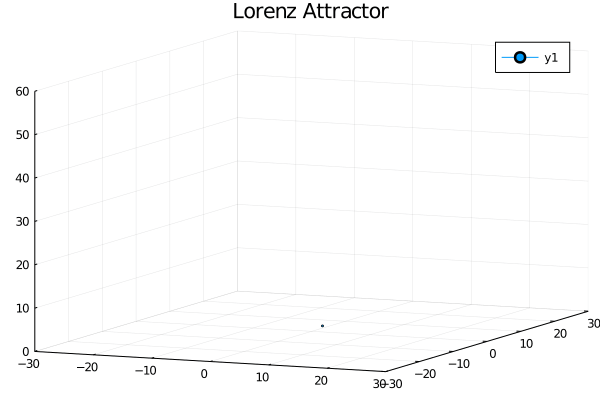

In [4]:
using Plots
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()

# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10